In [5]:
import os
import pandas as pd

out_root = '/home/ddon0001/PhD/experiments/ucb_rankings/'
all_ds = os.listdir(out_root)

all_ds_path = '/home/ddon0001/PhD/experiments/scaled/no_merges_all/solution_edges_datasets_with_FP_WS_FA_FE.csv'
all_df = pd.read_csv(all_ds_path)[['ds_name', 'solution_incorrect']]
plot_order = all_df.ds_name.value_counts().index

In [6]:
ds_names = []
xs = []
medians = []
third_quartiles = []
maxes = []
for ds_of_interest in all_ds:
    all_ucbs = os.listdir(os.path.join(out_root, ds_of_interest))
    ucb_dfs = {}
    for ucb in all_ucbs:
        ucb_val = float(ucb.rstrip('.csv').split('_')[-1])
        ucb_dfs[ucb_val] = pd.read_csv(os.path.join(out_root, ds_of_interest, ucb))
    sorted_keys = sorted(ucb_dfs.keys())
    for key in sorted_keys:
        df = ucb_dfs[key]
        df['presented_rank'] = df['bandit_rank'].rank(method='dense')
        incorrect = df[df['solution_incorrect'] == True]
        xs.append(key)
        medians.append(incorrect['presented_rank'].median())
        third_quartiles.append(incorrect['presented_rank'].quantile(0.75))
        maxes.append(incorrect['presented_rank'].max())
        ds_names.append(ds_of_interest)
summary_df = pd.DataFrame({
    'ds_name': ds_names,
    'gamma': xs,
    'median': medians,
    'third_quartile': third_quartiles,
    'max': maxes
})

In [7]:
per_feature_props = pd.read_csv('presented_props.csv')

In [21]:
per_feature_props

,ds_name,presented_prop_before_majority_dist,presented_rank_before_majority_dist,presented_rank_75_dist,presented_prop_before_majority_sens,presented_rank_before_majority_sens,presented_rank_75_sens,min_prop,min_rank
0,Fluo-N3DH-SIM+_01,0.014321,41,61,0.025847,74,112,0.014321,41
1,Fluo-N3DH-SIM+_02,0.021564,75,3320,0.058942,205,300,0.021564,75
2,Fluo-C3DL-MDA231_01,0.050595,17,46,0.922619,310,334,0.050595,17
3,Fluo-C3DL-MDA231_02,0.074681,41,109,0.080146,44,64,0.074681,41
4,Fluo-N2DH-GOWT1_01,0.005395,11,17,0.128494,262,397,0.005395,11
5,Fluo-N2DH-GOWT1_02,0.059113,144,195,0.097701,238,289,0.059113,144
6,PhC-C2DH-U373_01,0.003947,3,3,0.961842,731,731,0.003947,3
7,PhC-C2DH-U373_02,0.021645,15,22,0.803752,557,627,0.021645,15
8,Fluo-N2DL-HeLa_01,0.014165,122,534,0.027284,235,692,0.014165,122
9,Fluo-N2DL-HeLa_02,0.015064,382,1142,0.032493,824,1638,0.015064,382


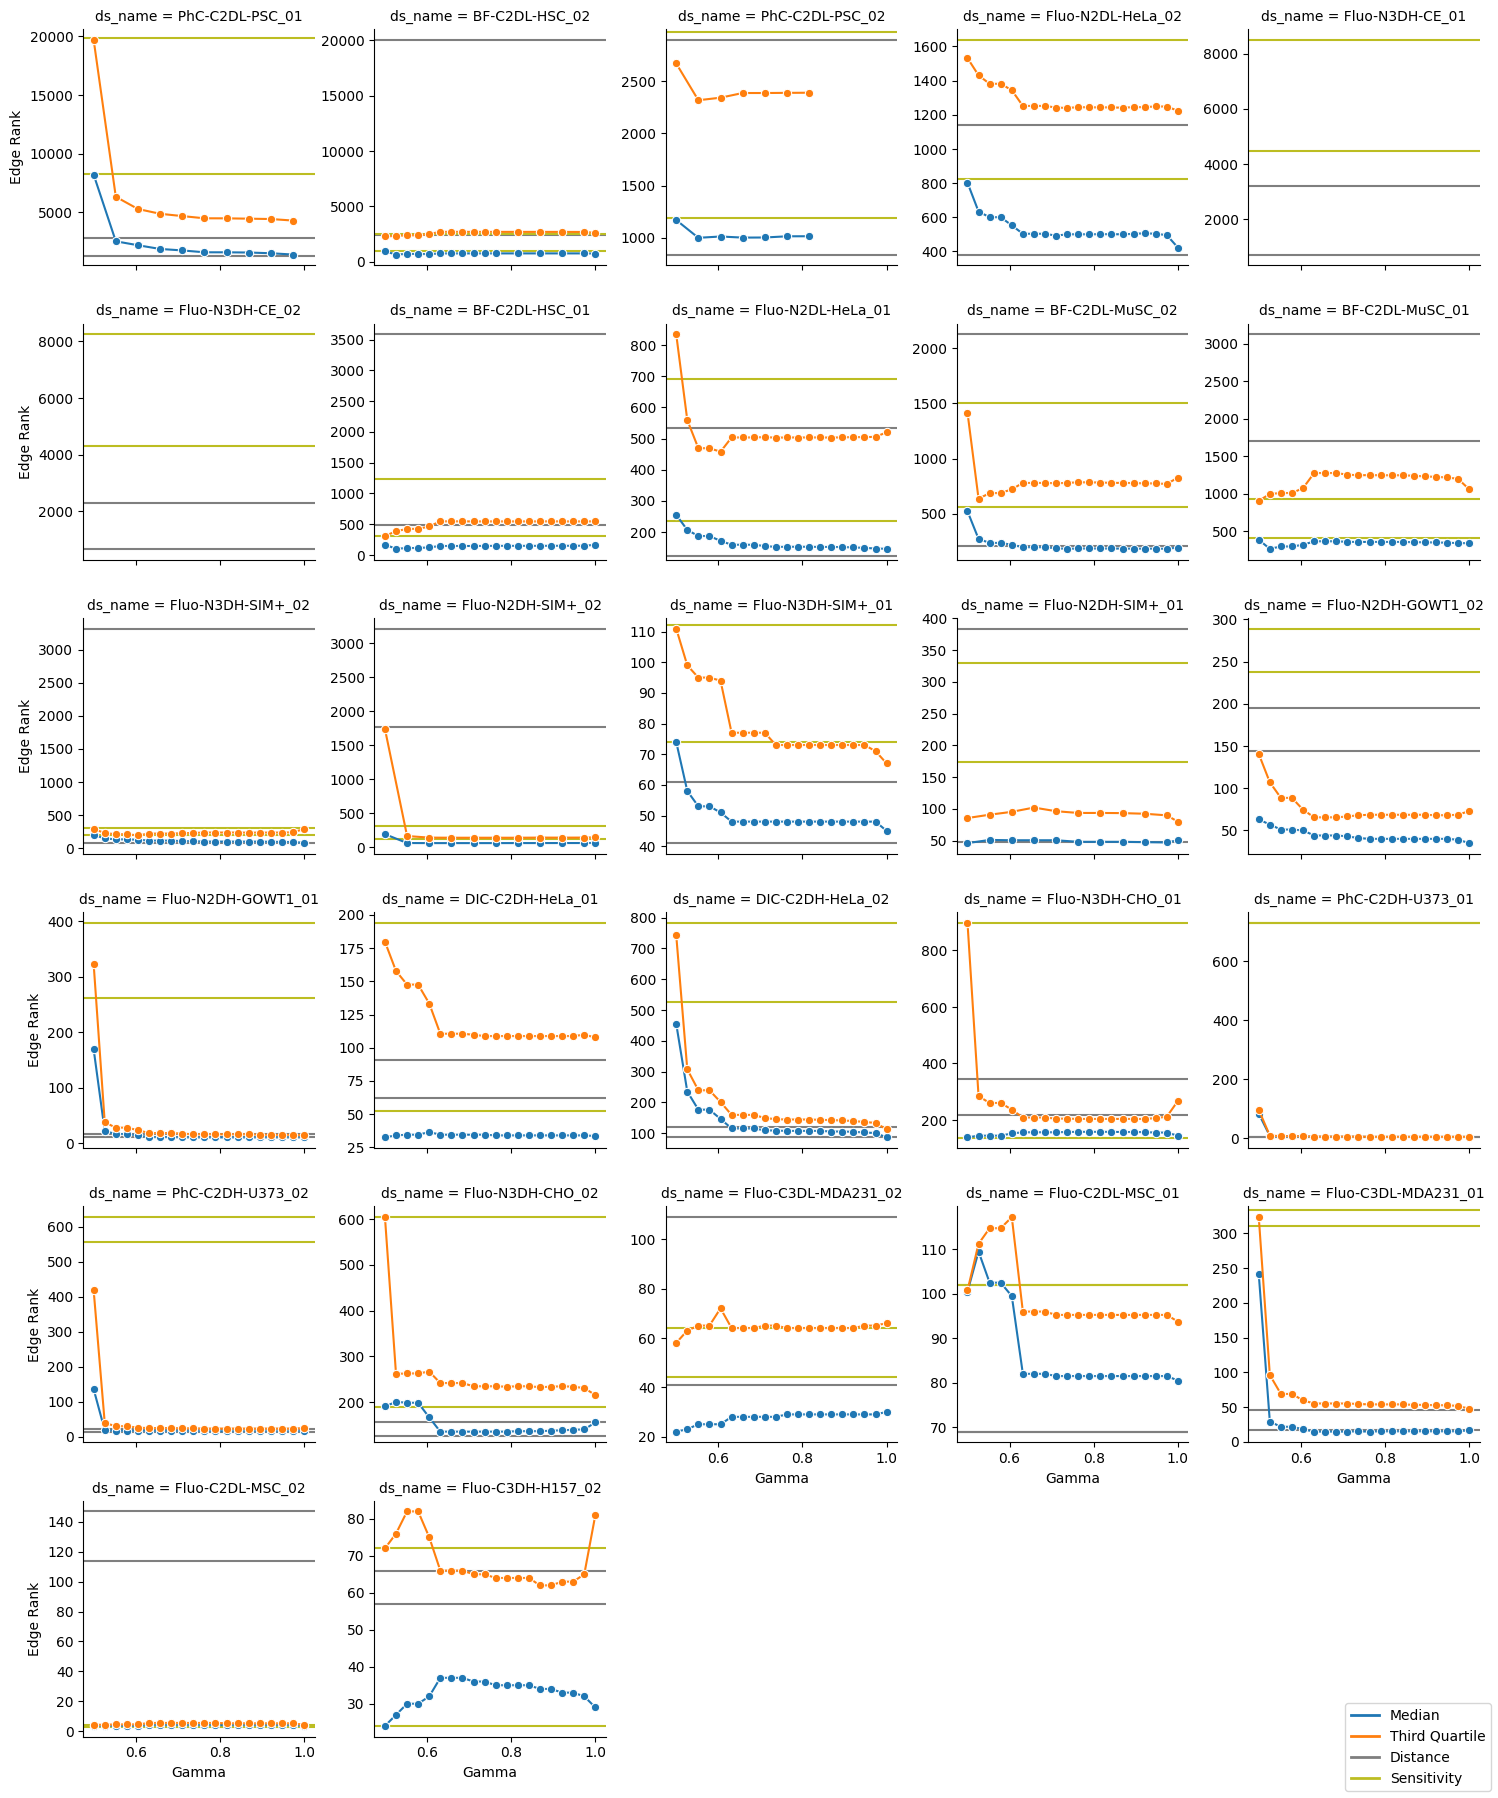

In [8]:
from matplotlib.lines import Line2D
import seaborn as sns

melted = summary_df.melt(id_vars=['ds_name', 'gamma'], value_vars=['median', 'third_quartile', 'max'])
melted_no_max = melted[melted['variable'] != 'max']

grid = sns.FacetGrid(melted_no_max, col='ds_name', sharex=True, sharey=False, hue='variable', col_wrap=5, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='gamma', y='value', marker='o')
for i, ax in enumerate(grid.axes.flat):
    ds_name = plot_order[i]
    props = per_feature_props[per_feature_props['ds_name'] == ds_name]
    ax.axhline(props['presented_rank_before_majority_dist'].values[0], color='tab:gray', zorder=0)
    ax.axhline(props['presented_rank_75_dist'].values[0], color='tab:gray', zorder=0)
    ax.axhline(props['presented_rank_before_majority_sens'].values[0], color='tab:olive', zorder=0)
    ax.axhline(props['presented_rank_75_sens'].values[0], color='tab:olive', zorder=0)
grid.set_xlabels('Gamma')
grid.set_ylabels('Edge Rank')

custom_lines = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2),
    Line2D([0], [0], color='tab:gray', lw=2),
    Line2D([0], [0], color='tab:olive', lw=2),


]
grid.figure.legend(custom_lines, ['Median', 'Third Quartile', 'Distance', 'Sensitivity'], loc='lower right')

In [ ]:
medians